# Potential energy surface of H$_2$S from TROVE/ExoMol

In [1]:
import numpy as np

In [2]:
!rm h2s_tyuterev.pyf
!f2py -m h2s_tyuterev -h h2s_tyuterev.pyf h2s_tyuterev.f90

rm: h2s_tyuterev.pyf: No such file or directory
Reading fortran codes...
	Reading file 'h2s_tyuterev.f90' (format:free)
Post-processing...
	Block: h2s_tyuterev
			Block: h2s_tyuterev
			Block: poten_xy2_tyuterev
Post-processing (stage 2)...
Saving signatures to file "./h2s_tyuterev.pyf"


In [3]:
!cat h2s_tyuterev.pyf

!    -*- f90 -*-
! Note: the context of this file is case sensitive.

python module h2s_tyuterev ! in 
    interface  ! in :h2s_tyuterev
        subroutine h2s_tyuterev(npoints,r12,r32,alpha,f) ! in :h2s_tyuterev:h2s_tyuterev.f90
            integer, optional,intent(in),check(len(r12)>=npoints),depend(r12) :: npoints=len(r12)
            real(kind=8) dimension(npoints),intent(in) :: r12
            real(kind=8) dimension(npoints),intent(in),depend(npoints) :: r32
            real(kind=8) dimension(npoints),intent(in),depend(npoints) :: alpha
            real(kind=8) dimension(npoints),intent(out),depend(npoints) :: f
        end subroutine h2s_tyuterev
        subroutine poten_xy2_tyuterev(npoints,nparams,r12,r32,alpha,params,f) ! in :h2s_tyuterev:h2s_tyuterev.f90
            integer, optional,intent(in),check(len(r12)>=npoints),depend(r12) :: npoints=len(r12)
            integer, optional,intent(in),check(len(params)>=nparams),depend(params) :: nparams=len(params)
            real(kin

In [4]:
!f2py -c h2s_tyuterev.pyf h2s_tyuterev.f90

running build
running config_cc
unifing config_cc, config, build_clib, build_ext, build commands --compiler options
running config_fc
unifing config_fc, config, build_clib, build_ext, build commands --fcompiler options
running build_src
build_src
building extension "h2s_tyuterev" sources
creating /var/folders/q6/by5wy_h90n96s1v6nb3t_qpc0000gn/T/tmpedr5a2om/src.macosx-11.0-arm64-3.9
f2py options: []
f2py: h2s_tyuterev.pyf
Reading fortran codes...
	Reading file 'h2s_tyuterev.pyf' (format:free)
Post-processing...
	Block: h2s_tyuterev
			Block: h2s_tyuterev
			Block: poten_xy2_tyuterev
Post-processing (stage 2)...
Building modules...
	Building module "h2s_tyuterev"...
		Constructing wrapper function "h2s_tyuterev"...
		  f = h2s_tyuterev(r12,r32,alpha,[npoints])
		Constructing wrapper function "poten_xy2_tyuterev"...
		  f = poten_xy2_tyuterev(r12,r32,alpha,params,[npoints,nparams])
	Wrote C/API module "h2s_tyuterev" to file "/var/folders/q6/by5wy_h90n96s1v6nb3t_qpc0000gn/T/tmpedr5a2om/src

ld: warning: dylib (/opt/homebrew/Cellar/gcc/11.2.0_1/lib/gcc/11/libgfortran.dylib) was built for newer macOS version (11.5) than being linked (11.0)
Removing build directory /var/folders/q6/by5wy_h90n96s1v6nb3t_qpc0000gn/T/tmpedr5a2om


In [5]:
import h2s_tyuterev

In [6]:
help(h2s_tyuterev)

Help on module h2s_tyuterev:

NAME
    h2s_tyuterev

DESCRIPTION
    This module 'h2s_tyuterev' is auto-generated with f2py (version:1.21.2).
    Functions:
      f = h2s_tyuterev(r12,r32,alpha,npoints=len(r12))
      f = poten_xy2_tyuterev(r12,r32,alpha,params,npoints=len(r12),nparams=len(params))
    .

DATA
    __f2py_numpy_version__ = '1.21.2'
    h2s_tyuterev = <fortran object>
    poten_xy2_tyuterev = <fortran object>

VERSION
    1.21.2

FILE
    /Users/yachmena/richmol/potentials/h2s_tyuterev.cpython-39-darwin.so




In [7]:
print(h2s_tyuterev.h2s_tyuterev.__doc__)

f = h2s_tyuterev(r12,r32,alpha,[npoints])

Wrapper for ``h2s_tyuterev``.

Parameters
----------
r12 : input rank-1 array('d') with bounds (npoints)
r32 : input rank-1 array('d') with bounds (npoints)
alpha : input rank-1 array('d') with bounds (npoints)

Other Parameters
----------------
npoints : input int, optional
    Default: len(r12)

Returns
-------
f : rank-1 array('d') with bounds (npoints)



equilibrium q0: [1.3358387  1.3358387  1.61042427]
r1 potential cut


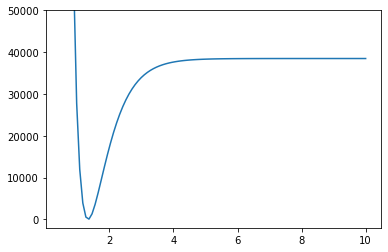

alpha potential cut


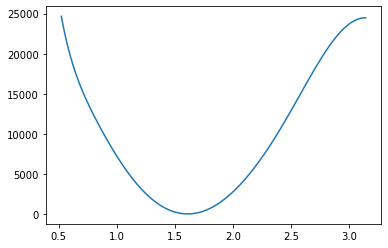

In [9]:
import matplotlib.pyplot as plt
from scipy import optimize


def poten(q):
    r1, r2, a = q.T
    return h2s_tyuterev.h2s_tyuterev(r1, r2, a)

q0 = optimize.minimize(poten, [1.0, 1.0, np.pi/2]).x
print("equilibrium q0:", q0)


r1 = np.linspace(0.5, 10.0, 100)
q = np.array(np.broadcast_to(q0, (len(r1), len(q0))))
q[:, 0] = r1
v = poten(q)

print("r1 potential cut")
plt.ylim(-2e3, 5e4)
plt.plot(r1, poten(q))
plt.show()


a = np.linspace(30, 180, 100) * np.pi/180.0
q = np.array(np.broadcast_to(q0, (len(a), len(q0))))
q[:, 2] = a
v = poten(q)

print("alpha potential cut")
plt.plot(a, poten(q))
plt.show()